In [4]:
import pymc3 as pm

with pm.Model() as model:
    param = pm.Exponential('poi_param', 1)
    data_gen = pm.Poisson('data_gen', param)
    
    data_plus_one = data_gen + 1
    

In [8]:
data_plus_one.tag.test_value

array(1)

In [9]:
with pm.Model() as model:
    theta = pm.Exponential('theta', 2)
    data_generator = pm.Poisson('data_gen', theta)

In [13]:
theta.tag.test_value

array(0.3465735986138816)

In [30]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1)
    lambda_2 = pm.Exponential("lambda_2", 1)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

new_deterministic_variable = lambda_1 + lambda_2

In [15]:
# init stochastic vrs
with model:
    
    betas = pm.Uniform('betas', 0, 1, shape=4)


In [16]:
betas.tag.test_value

array([ 0.5,  0.5,  0.5,  0.5])

In [19]:
def subtract(x, y):
    return x - y


with pm.Model() as model:
    l_1 = pm.Poisson('lambda_1', 1.5)
    l_2 = pm.Poisson('lambda_2', 4.5)
    
    det_1 = pm.Deterministic('delta', subtract(l_1, l_2))

In [22]:
det_1.tag.test_value

array(-3)

In [23]:
import theano.tensor as tt

with pm.Model() as theano_test:
    p1 = pm.Uniform('p', 0, 1)
    p2 = 1 - p1
    
    p = tt.stack([p1, p2])
    
    assignment = pm.Categorical('assignment', p)

In [63]:
% matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(4, 3)

In [87]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1)
    lambda_2 = pm.Exponential("lambda_2", 1)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

new_deterministic_variable = lambda_1 + lambda_2

In [88]:
import numpy as np

n_data_points = 5  # in CH1 we had ~70 data points
idx = np.arange(n_data_points)
with model:
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

In [89]:
lambda_1.random()

array([ 1.27031558])

In [90]:
sample = [lambda_1.random()[0] for i in range(20000)]

(array([  3.28000000e+03,   2.77600000e+03,   2.30300000e+03,
          1.94400000e+03,   1.59300000e+03,   1.37800000e+03,
          1.15400000e+03,   9.83000000e+02,   7.43000000e+02,
          6.61000000e+02,   5.13000000e+02,   4.73000000e+02,
          3.67000000e+02,   2.97000000e+02,   2.59000000e+02,
          2.42000000e+02,   1.89000000e+02,   1.45000000e+02,
          1.04000000e+02,   9.50000000e+01,   8.60000000e+01,
          7.50000000e+01,   6.40000000e+01,   4.80000000e+01,
          3.60000000e+01,   2.50000000e+01,   2.80000000e+01,
          2.00000000e+01,   2.40000000e+01,   1.90000000e+01,
          1.50000000e+01,   1.30000000e+01,   4.00000000e+00,
          9.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          1.00000000e+01,   6.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

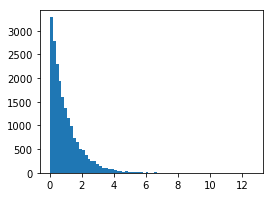

In [91]:
plt.hist(sample, bins=70)

In [92]:
date = np.array([10,5])
with model:
    fixed_variable = pm.Poisson('fxd', 1, observed=date)

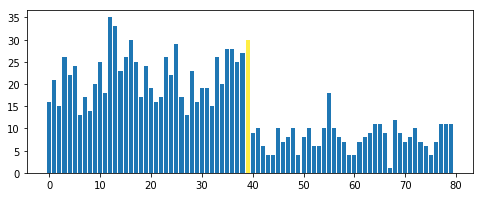

In [117]:


tau = np.random.randint(0, 80)

alpha = 1./20.
lambda_1, lambda_2 = np.random.exponential(scale=1./alpha, size=2)

data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80-tau)]

plt.bar(np.arange(80), data)
plt.bar(tau-1, data[tau-1], color='#FFEE44')

figsize(8, 3)

In [144]:
## a b testing

import pymc3 as pm

with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)

In [145]:
p_true = .05
N = 150000

occurences = stats.bernoulli.rvs(p_true, size=N)

In [146]:
with model:
    obs = pm.Bernoulli('obs', p, observed=occurences)
    step = pm.Metropolis()
    trace = pm.sample(18999, step=step)
    burned_trace = trace[1000:]

/home/nol/anaconda3/envs/snowflake/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
100%|██████████| 18999/18999 [00:51<00:00, 366.74it/s]


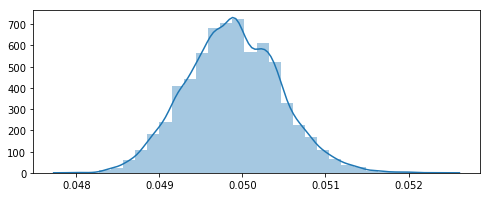

In [150]:
import seaborn as sns
sns.distplot(burned_trace['p'], bins=30)

In [166]:
## a and b togther
p_1 = 0.04
p_2 = 0.05
N = 500000

occurences_1 = stats.bernoulli.rvs(p_1, size=N)
occurences_2 = stats.bernoulli.rvs(p_2, size=N)




In [172]:
with pm.Model() as model:
    p_1 = pm.Uniform('p_1', 0, 1)
    obs_1 = pm.Bernoulli('obs_1', p_1, observed=occurences_1)
    
    p_2 = pm.Uniform('p_2', 0, 1)
    
    obs_2 = pm.Bernoulli('obs_2', p_2, observed=occurences_2)
    
    diff = pm.Deterministic('delta', abs(p_1 - p_2))

/home/nol/anaconda3/envs/snowflake/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [174]:

with model:
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step)






100%|██████████| 1000/1000 [00:16<00:00, 52.74it/s]


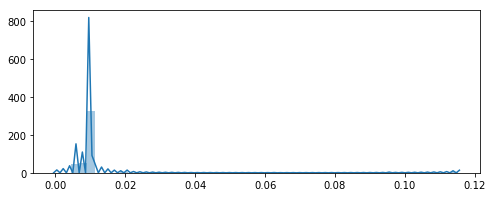

In [175]:
sns.distplot(trace['delta'])